# Expected Length of the Coffee Shop Line (Queueing Theory)

It's 5:45 PM on a Sunday, and you are sitting in the university library trying to crank out the last of your weekend assignments. You've been working since noon, and you decide it's time to hotwire your exhausted brain with some caffeine. It's only a short walk to the nearest coffee shop, so you pack up your laptop and notebooks and decide to go for it.

Upon walking into the coffee shop, you notice there are around ten people in line. "Ten people on a Sunday evening?" you think, "I thought coffee was supposed to be a morning drink." And yet, here you are. After weighing your need for coffee versus the time you could spend writing your essay, you decide the coffee is probably not worth it.

On the walk back, you think about the effect that the long line had on your decision. In some sense, the cost of waiting in line makes the length of the line a self-sustaining system, since more people standing in line makes it less likely that even more people will enter. In fact, you realize, if the base rate of new customers exceeds the base rate of drink preparation, then this is the only mechanism by which the line will stabilize.

When you arrive back at your desk, you decide that your essay is far less interesting than mathematically modeling your favorite coffee shop.

## Poisson process

Before doing any calculations regarding the number of customers in line, we need a mathematical model of the customers themselves, along with how the drinks are prepared.

First, let's make the assumption that customers arrive at the coffee shop independently of one another at some average rate of $\lambda$ customers per hour.

You may already see two problems with this assumption: first, customers will sometimes come in groups, which are not independent. Second, the number of customers depends on the time of day. Both of these ideas are valid, and I will discuss both of these ideas later in the post.

The second assumption is that the amount of time it takes to prepare a drink is independent between drinks with an average rate of $\mu$ drinks per hour.

This assumptions also seems invalid because certain drinks may be ordered frequently and thus have a set amount of time to prepare, but if we assume that the menu is very large and incorporate some randomness for the baristas to chat, drop a spoon every now and then, and occasionally have to go clean equipment then it is not a bad assumption.

From these two assumptions, it follows that customers arrive according to a Poisson process with rate $\lambda$ and that drinks are prepared according to a Poisson process with rate $\mu$ (assuming there is always a customer present).

## Birth-death processes

Let $N(t)$ denote the number of people in line at time $t$. It follows that $\{N(t):t\geq 0\}$ is a stochastic process where the set of all possible states of the system is the set of non-negative integers, $\mathbb N_0 = \{0,1,2,\dots,\}$.

Let's make the following assumptions:

1. Customers arrive in the coffee shop independently of one another with an average rate of $\lambda$ customers per hour.

2. Baristas prepare drinks independently of one another with an average rate of $\mu$ drinks per hour.

If these assumptions hold, then we can describe $N(t)$ as a *birth-death process* with the following state transition diagram:

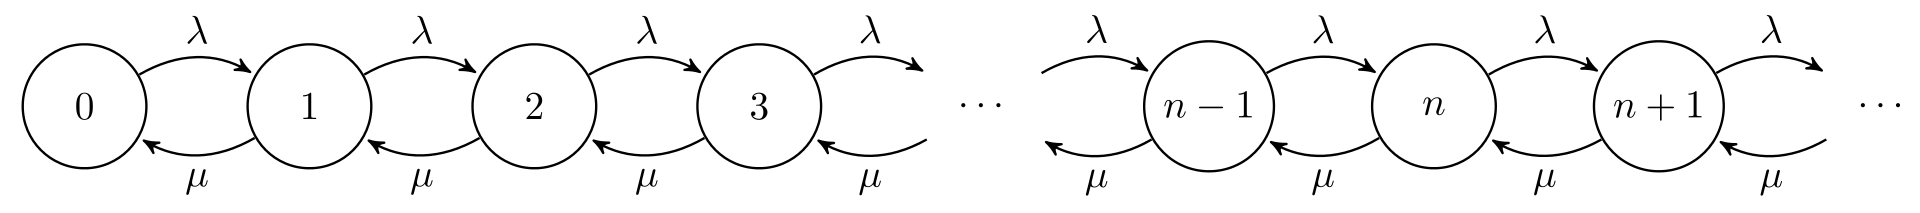

Your intuition about this process might be the following:

Case 1. if $\lambda<\mu$ (baristas make drinks faster than customers arrive) then the line should remain relatively short.

Case 2. if $\lambda>\mu$ (customers arrive faster than baritas can make drinks), then, without any additional assumptions, the line will grow arbitrarily long as time progresses.

The third case $\lambda=\mu$ is interesting, albeit trivial, beacuse it means the line will neither grow nor shrink on average. However, this case is unrealistic (and in measure-theoretic terms, it has no chance of happening).

## Simulation

In this section, we provide some numerical evidence for the above claims (before diving into the pure mathematics).

In [156]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [158]:
def simulate(customer_rate, barista_rate, t_max):
    t = 0
    N = 0

    N_t = [[t, N]]

    while t < t_max:

        t_customer = np.random.exponential(customer_rate)
        
        if N == 0:
            t_drink = np.inf
        elif N > 0:
            t_drink = np.random.exponential(barista_rate)

        if t_customer < t_drink:
            t += t_customer
            N_t.append([t, N])
            N += 1
        else:
            t += t_drink
            N_t.append([t, N])
            N -= 1
        N_t.append([t, N])
        
    return N_t

In [159]:
def plot(N_t, t_max):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel('Time (minutes)')
    ax.set_ylabel('Number of customers')
    ax.set_title('Number of customers in line over time')
    ax.set_xlim((0, t_max))

    ax.plot(*np.transpose(N_t))
    plt.show()

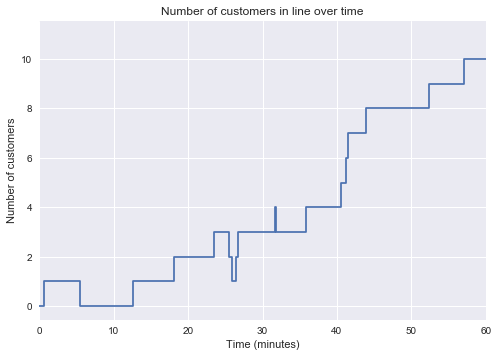

In [160]:
N_t = simulate(customer_rate=5, barista_rate=10, t_max=60)
plot(N_t, t_max=60)

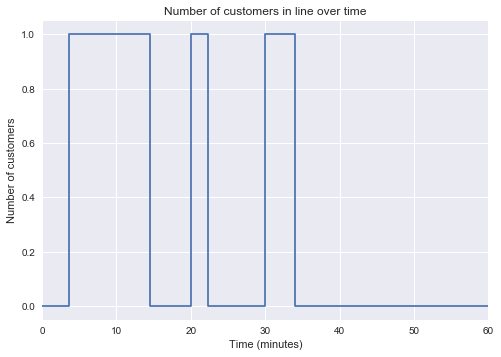

In [162]:
N_t = simulate(customer_rate=10, barista_rate=5, t_max=60)
plot(N_t, t_max=60)

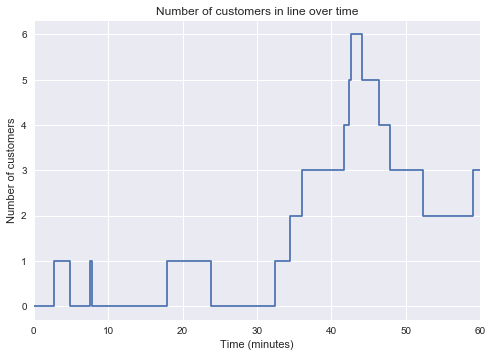

In [163]:
N_t = simulate(customer_rate=5, barista_rate=5, t_max=60)
plot(N_t, t_max=60)

# The stationary distribution

In queueing theory, the type of queue we have just described is called an M/M/1 queue.

In the long-term, the number of people in line will follow the stationary distribution. This is given by a probability distrbiution on the set $\{0,1,2,\dots,\}$ which we may denote

$$ \pi = (\pi_0,\pi_1,\pi_2,\dots) $$

We have the transition matrix

$$ Q = \left[ \begin{matrix}
-\lambda & \lambda        & 0              & 0              & \cdots \\
\mu      & -(\mu+\lambda) & \lambda        & 0              & \cdots \\
0        & \mu            & -(\mu+\lambda) & \lambda        & \cdots \\
0        & 0              & \mu            & -(\mu+\lambda) & \cdots \\
\vdots   & \vdots         & \vdots         & \vdots         & \ddots
\end{matrix} \right] $$

The stationary state will satisfy the equation

$$ \pi Q = 0 $$

This leads to $-\lambda \pi_0 + \mu\pi_1 = 0$ and $\lambda \pi_i - (\mu+\lambda)\pi_{i+1} + \mu\pi_{i+2} = 0$ for all $i\geq 0$.

Without diving into the details, this is a second order linear recurrence whose solution is given by $\pi_n = \left(1 - \frac{\lambda}{\mu}\right)\left(\frac{\lambda}{\mu}\right)^n$. (Exercise for the reader: prove it!) One could recognize that *if $\lambda<\mu$*, this is the probability mass function (pmf) of a geometric distribution with parameter $p=1-\frac{\lambda}{\mu}$.

Therefore, the average length of the line is given by

$$ E[N] = \frac{\lambda}{\mu-\lambda} $$

## The stationary distribution

In the long-term, the number of people in line will follow the stationary distribution. This is given by a probability distrbiution on the set $\{0,1,2,\dots,\}$ which we may denote

$$ \pi = (\pi_0,\pi_1,\pi_2,\dots) $$

We have the transition matrix

$$ Q = \left[ \begin{matrix}
-\lambda p_0 & \lambda p_0 & 0 & 0 & 0 & \cdots \\
\mu & -(\mu+\lambda p_1) & \lambda p_1 & 0 & 0 & \cdots \\
0 & \mu & -(\mu+\lambda p_2) & \lambda p_2 & 0 & \cdots \\
0 & 0 & \mu & -(\mu+\lambda p_3) & \lambda p_3 & \cdots \\
0 & 0 & 0 & \mu & -(\mu+\lambda p_4) & \cdots \\
\vdots & \vdots & \vdots & \vdots & \vdots & \ddots
\end{matrix} \right] $$

The stationary state will satisfy the equation

$$ \pi Q = 0 $$

This leads to

$$ -\lambda p_0\pi_0 + \mu\pi_1 = 0 $$
and
$$ \lambda p_i\pi_i - (\mu+\lambda p_{i+1})\pi_{i+1} + \mu\pi_{i+2} = 0 $$

Solving the first equation for $\pi_1$ we obtain
$$ \pi_1 = \frac{\lambda}{\mu}p_0\pi_0 $$
Solving the second equation for $\pi_{i+2}$ we get
$$ \pi_{i+2} = (1+\frac{\lambda}{\mu}p_{i+1})\pi_{i+1}-\frac{\lambda}{\mu} p_i\pi_i $$
Let us replace $r=\lambda/\mu$ for convenience. Then
$$ \pi_{i+2} = (1+rp_{i+1})\pi_{i+1}-rp_i\pi_i $$

Now we can solve to $\pi_2$
$$ \pi_2 = (1+rp_1)\pi_1-rp_0\pi_0 $$
Then
$$ \pi_2 = (1+rp_1)rp_0\pi_0 - rp_i\pi_i $$
So
$$ \pi_2 = r^2p_0p_1\pi_0 $$

In general, we conjecture the following:
$$ \pi_n = \left(\frac{\lambda}{\mu}\right)^n\pi_0\prod_{i=0}^{n-1}p_i $$

Since $\sum_{n=0}^{\infty}\pi_n=1$, it follows that

$$ \sum_{n=0}^{\infty}\left(\frac{\lambda}{\mu}\right)^n\pi_0\prod_{i=0}^{n-1}p_i =1 $$
So
$$ \pi_0 = \frac{1}{\sum_{n=0}^{\infty}\left(\frac{\lambda}{\mu}\right)^n\prod_{i=0}^{n-1}p_i} $$


Its expected value is given by
$$ E[N] = \sum_{n=0}^{\infty} n\left(\frac{\lambda}{\mu}\right)^n\pi_0\prod_{i=0}^{n-1}p_i $$

In the special standard case when the probabilites are all $1$ we have
$$ E[N] = \sum_{n=0}^{\infty} n \left(\frac{\lambda}{\mu}\right)^n \pi_0 $$
where
$$ \pi_0 = \frac{1}{\sum_{n=0}^{\infty}\left(\frac{\lambda}{\mu}\right)^n} = 1 - \frac{\lambda}{\mu} $$

### References

Kendall, D. G. (1953). "Stochastic Processes Occurring in the Theory of Queues and their Analysis by the Method of the Imbedded Markov Chain". The Annals of Mathematical Statistics. 24 (3): 338–354. doi:10.1214/aoms/1177728975. JSTOR 2236285.